In [1]:
import numpy as np
import sys
from io import BytesIO
from flask import Flask, render_template, send_file, make_response, request

import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

from interp3d import interp_3d
from scipy.interpolate import RegularGridInterpolator

In [2]:
sys.path.insert(0, '/Users/miguel/.local/python_utils/')
sys.path.insert(0, '/Users/miguel/.local/python_utils/SDSS/')

In [3]:
from SDSS_viewer.compute import *

***
***
***

In [4]:
PATH_DEN = '/Users/miguel/Desktop/SDSS_density_explorer/Data/'
#FILE_DEN = 'DR13_D_all-XX_G15.Y-0.den-mean.fvol'
#FILE_DEN = 'DR13_D_all-01.masked.fvol'
FILE_DEN = 'DR13_D_all_random_boundary.ENS-256.SIG-0.5.fvol'

#--- Read volume as global variable
print('>>> Reading volume...')
vol_den = read_fvolume(PATH_DEN + FILE_DEN)
print('>>>    ready!')

>>> Reading volume...
>>> Reading volume of size: 1024 512 512
>>>    ready!


In [5]:
vol_den = np.asfarray( vol_den, dtype='float' )

In [6]:
x = np.linspace(0,1023,1024)
y = np.linspace(0,511,512)
z = np.linspace(0,511,512)

X,Y,Z = np.meshgrid(x,y,z,indexing='ij')
interp = interp_3d.Interp3D(vol_den, x,y,z)

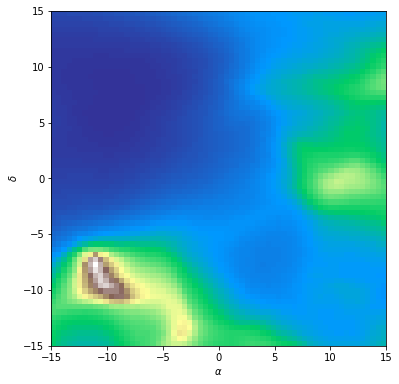

In [8]:
#--------------------------------------------
#
#  Redshift (sky) projection (RA,DEC)
#  -------
#
#  VOID_04
#  http://127.0.0.1:5000/slice_reds/?ra_delta=30&dec_delta=30&n_ra=64&n_dec=64&ra=155.6469&dec=45.6392&reds=0.020	
#  Polar ring:
#  http://127.0.0.1:5000/slice_reds/?ra_delta=30&dec_delta=30&n_ra=64&n_dec=64&ra=157.0802&dec=62.5840&reds=0.0178
#

ima = get_reds_slice_simple(vol_den, interp, ra=155.6469, dec=45.6392, reds=0.02, ra_delta=30, dec_delta=30, n_ra=64, n_dec=64)
ra_delta=30
dec_delta=30
x1 = -ra_delta/2
x2 =  ra_delta/2
y1 = -dec_delta/2
y2 =  dec_delta/2
fig, ax = plt.subplots(1)
plt.rcParams['figure.figsize'] = [6, 6]
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\delta$')
plt.imshow(ima,interpolation="none", origin='lower',cmap='terrain',extent=[x1,x2,y1,y2])
plt.show()

>>>  155.6469 155.6469 30.639200000000002 60.17045


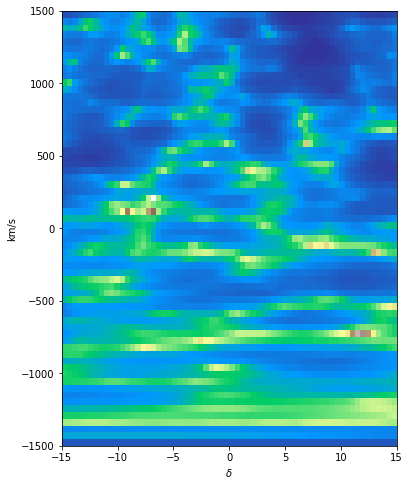

In [8]:
#--------------------------------------------
#
#  Right Ascencion slice (DEC,z)
#  -------
#  VOID_04
#  http://127.0.0.1:5000/slice_ra/?dec_delta=30&reds_delta=0.01&n_dec=64&n_reds=64&ra=155.6469&dec=45.6392&reds=0.020
#  Polar ring:
#  http://127.0.0.1:5000/slice_ra/?dec_delta=30&reds_delta=0.01&n_dec=64&n_reds=64&ra=157.0802&dec=62.5840&reds=0.0178
#
dec_delta=30

c_l = 300000.0
reds_delta = 0.01
ima = get_ra_slice(vol_den=vol_den, interp=interp, ra=155.6469, dec=45.6392, reds=0.05, dec_delta=30, reds_delta=0.1, n_dec=64, n_reds=64)

x1 = -dec_delta/2
x2 =  dec_delta/2
y1 = -(reds_delta/2)*c_l
y2 =  (reds_delta/2)*c_l
fig, ax = plt.subplots(1)
plt.rcParams['figure.figsize'] = [6, 8]
ax.set_xlabel(r'$\delta$')
ax.set_ylabel('km/s')
plt.imshow(ima,interpolation="none", origin='lower',cmap='terrain',extent=[x1,x2,y1,y2],aspect='auto')
plt.show()

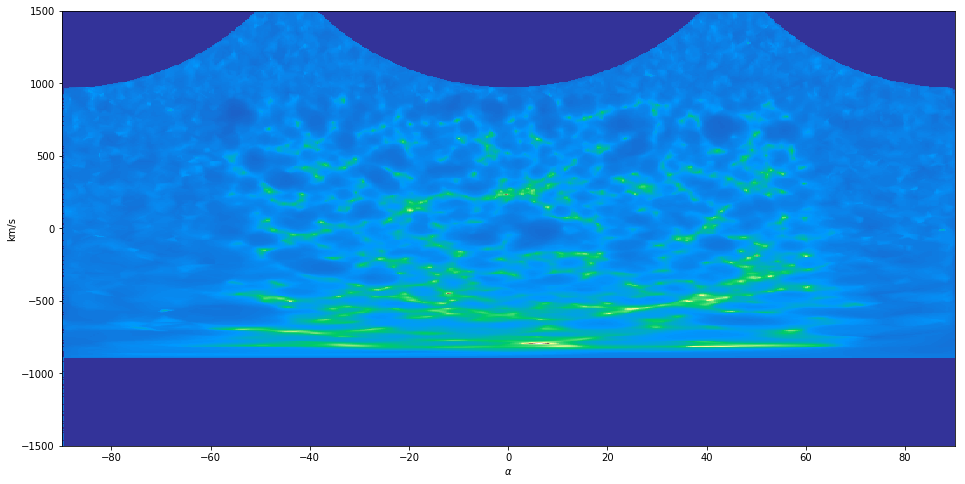

In [23]:
#--------------------------------------------
#
#  Declination slice (RA,z)
#  -------
#  VOID_04
#  http://127.0.0.1:5000/slice_dec/?ra_delta=30&reds_delta=0.01&n_ra=64&n_reds=64&ra=155.6469&dec=45.6392&reds=0.020
#  Polar ring:
#  http://127.0.0.1:5000/slice_dec/?ra_delta=30&reds_delta=0.01&n_ra=64&n_reds=64&ra=157.0802&dec=62.5840&reds=0.0178
#
ra_delta = 180

c_l = 300000.0
reds_delta = 0.01
ima = get_dec_slice_correct(vol_den, interp, ra=180, dec=5.0, reds=0.06, ra_delta=ra_delta, reds_delta=0.2, n_ra=512, n_reds=512)
    
x1 = -ra_delta/2
x2 =  ra_delta/2
y1 = -(reds_delta/2)*c_l
y2 =  (reds_delta/2)*c_l

fig, ax = plt.subplots(1)
plt.rcParams['figure.figsize'] = [16, 8]
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('km/s')
plt.imshow(ima,interpolation="none", origin='lower',cmap='terrain',extent=[x1,x2,y1,y2],aspect='auto')
plt.show()

>>>  20 0.004866666666666667


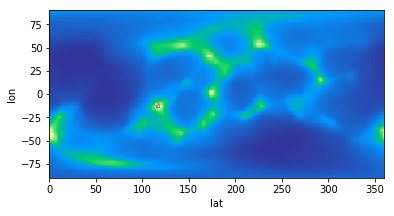

In [10]:
#--------------------------------------------
#
#  Sphere around galaxy
#  -------
#
#  VOID_04
#  http://127.0.0.1:5000/sky_sphere/?n_lon=256&n_lat=128&ra=155.6469&dec=45.6392&reds=0.020&radius=20	
#  Polar ring:
#  http://127.0.0.1:5000/sky_sphere/?n_lon=256&n_lat=128&ra=157.0802&dec=62.5840&reds=0.0178&radius=20
#

ima = get_sphere_simple(vol_den, interp, ra=155.6469, dec=45.6392, reds=0.020, n_lon=256, n_lat=128, radius=20)

x1 = 0
x2 = 360
y1 = -90
y2 = 90
fig, ax = plt.subplots(1)
plt.rcParams['figure.figsize'] = [16, 8]
ax.set_xlabel('lat')
ax.set_ylabel('lon')
plt.imshow(ima,interpolation="none", origin='lower',cmap='terrain',extent=[x1,x2,y1,y2])
plt.show()